In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
database = pd.read_csv('database/airbnb.csv')

In [89]:
duplicated_rows = database.duplicated()
print(duplicated_rows.any())

False


In [90]:
database.columns

Index(['id', 'title', 'description', 'typeDescription', 'roomType',
       'discountedPrice', 'price', 'originalPrice', 'day5Price', 'url',
       'ratingValue', 'ratingReviewsCount', 'ratingGuestSatisfaction',
       'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy',
       'ratingLocation', 'hostID', 'hostName', 'hostAbout', 'hostRating',
       'hostIsSuper', 'hostTimeResponse', 'hostResponseRate', 'latitude',
       'longitude', 'highlights', 'highlightsHost', 'highlightsLocation',
       'origin'],
      dtype='object')

In [91]:
# Remover "R$" e converter colunas de preço para float
def convert_price(value):
    """Remove o símbolo 'R$' e converte para float"""
    return float(value.replace("R$", "").replace(",", "").strip()) if isinstance(value, str) else value

In [92]:
database['discountedPrice'] = database['discountedPrice'].apply(convert_price)
database['price'] = database['price'].apply(convert_price)
database['originalPrice'] = database['originalPrice'].apply(convert_price)
database['day5Price'] = database['day5Price'].apply(convert_price)

## 1. Mapeamento ##

In [93]:
import folium
from folium.plugins import MarkerCluster

In [94]:
# visualização com base nas médias das latitudes e longitudes
map_center_lat= database['latitude'].mean()
map_center_log= database['longitude'].mean()

#criação e atribuição do mapa a variável map_stm
map_geral = folium.Map((map_center_lat, map_center_log), tiles="cartodb positron", control_scale=True,)
#(latitude,longitude)

In [95]:
marker_cluster = MarkerCluster().add_to(map_geral)

# iterrows() -> (indíce, linha)
for i, row in database.iterrows():
    try: 
        lat = row['latitude']
        lon = row['longitude']

        # verificação se os valores em lat e lon são números e se são int ou float, caso seja avaliado como invalido irá pular (continue) a coordenada da linha
        if pd.isna(lat) or pd.isna(lon) or not (isinstance(lat, (int,float)) and isinstance(lon, (int, float))): 
            continue

        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    except (KeyError, TypeError) as e:
        print(f"Erro processando linha de index {i}:{e}")
        continue


In [96]:
map_geral

## 2. Avaliações ##

In [97]:
origin_room_type_counts = database.groupby(['origin', 'roomType']).size().unstack(fill_value=0)
print("Quantidade de tipos de hospedagem por origem:")
print(origin_room_type_counts)

Quantidade de tipos de hospedagem por origem:
roomType  Entire home/apt  Private room  Shared room
origin                                              
blm                   277           130            6
stm                   306           141            6


### Correlação entre Avaliações e Preço ###

In [98]:
database.head(10)

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,NaN,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,NaN,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,NaN,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,NaN,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
5,35282485,Quarto silencioso próximo ao Bosque,Ambiente familiar calmo e aconchegante.O quart...,"Quarto em Marco, Brasil",Private room,NaN,119.0,NaN,505.00,https://www.airbnb.com/rooms/35282485?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.433770,-48.459260,"['No top 5% das acomodações', 'Quarto em apart...","['Idiomas: francês', 'Moro em: State of Pará, ...","['Bairro residencial, tranquilo, com local pró...",blm
6,1327049905751092176,Quarto com excelente localização,Suíte ampla e aconchegante com entrada lateral...,"Quarto em Belém, Brasil",Private room,NaN,145.0,NaN,618.00,https://www.airbnb.com/rooms/13270499057510921...,...,5.00,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.396890,-48.474600,"['Quarto em casa', 'Experiência de check-in ex...","['Nasci na década de 90', 'Meu trabalho: Empre...","[nan, nan]",blm
7,41744419,"STUDIO 306 | WIFI 600MB | RESIDENCIAL JC, um l...","O apartamento 306 é aconchegante, alinhado e o...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,201.0,NaN,995.00,https://www.airbnb.com/rooms/41744419?locale=p...,...,4.93,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.462184,-48.488110,"['Self check-in', 'Ótima localização', 'Cancel...",['Meu trabalho: Jc Residencial e Administração...,['Estamos localizados no coração de Batista Ca...,blm
8,791310251933878840,Quarto na melhor localização,Sejam bem-vindos! 🤍 LEIA A ABA REGRAS DA CASA ...,"Quarto em Belém, Brasil",Private room,62.0,62.0,75.0,330.00,https://www.airbnb

In [99]:
database['originalPrice'] = database['originalPrice'].fillna(database['price'])

In [100]:
database

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.000,423.000,1.710,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.000,518.000,2.060,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.000,135.000,575.000,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.000,135.000,530.000,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.000,78.000,330.000,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1328353590628975017,Alterlar Casa de Praia em Alter do Chão,Opção perfeita para você e sua família que que...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,843.0,1.023,1.023,4.500,https://www.airbnb.com/rooms/13283535906289750...,...,0.00,False,NaN,NaN,-2.502640,-54.945950,"['Caminhada de 1 minuto até o lago', 'Comodida...","['Meu trabalho: Dentista', nan, nan, nan, nan]","[nan, nan]",stm
862,45629422,Casa em Alter do Chão no Centro acesso as praias.,- Garagem pra 3 carros;- Quarto 1 com uma cama...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,3.000,https://www.airbnb.com/rooms/45629422?locale=p...,...,4.89,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.503330,-54.953490,"['Fique no fresquinho', 'Comodidades ao ar liv...","['Moro em: Santarém, Brasil', nan, nan, nan, nan]","['A casa fica no centro de Alter do Chão, na r...",stm
863,1091261682652318404,Suíte casal,Este lugar cheio de estilo fica perto de desti...,"Quarto em hotel em Santarém, Brasil",Private room,348.0,421.000,421.000,1.830,https://www.airbnb.com/rooms/10912616826523184...,...,5.00,False,Responde em até um dia,Taxa de resposta: 67%,-2.511220,-54.949550,"['Self check-in', 'Comodidades ao ar livre', '...","['Nasci na década de 70', 'Onde estudei: Unive...","[nan, nan]",stm
864,1198601539719395137,Sobrado Alter.,Abrace a natureza sem abrir mão do conforto e ...,"Espaço intei

In [101]:
correlation_price = database[['discountedPrice', 'originalPrice', 'ratingValue']].corr()

print("Correlação entre Preço e Avaliações:")
print(correlation_price)

Correlação entre Preço e Avaliações:
                 discountedPrice  originalPrice  ratingValue
discountedPrice         1.000000       0.679777    -0.109781
originalPrice           0.679777       1.000000    -0.094315
ratingValue            -0.109781      -0.094315     1.000000


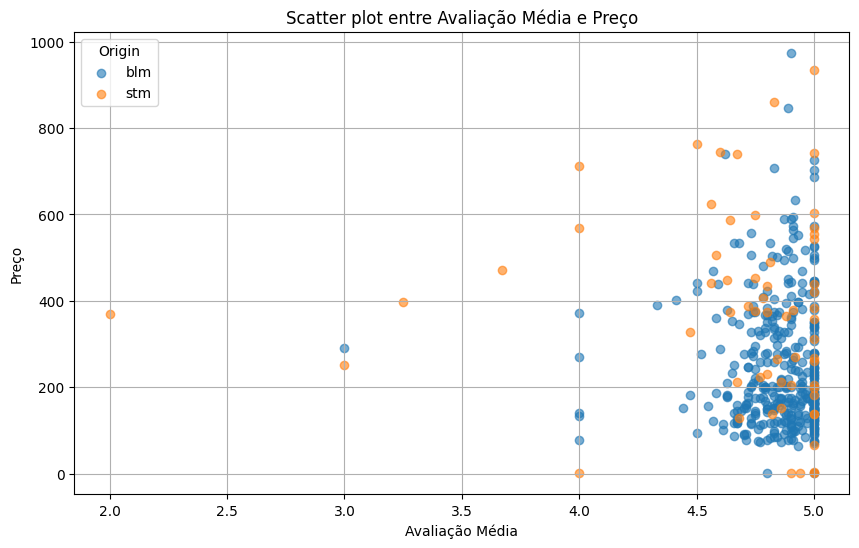

In [102]:
# Scatter plot entre ratingValue e originalPrice
plt.figure(figsize=(10, 6))
for origin in database['origin'].unique():
    subset = database[database['origin'] == origin]
    plt.scatter(subset['ratingValue'], subset['originalPrice'], label=origin, alpha=0.6)

plt.title('Scatter plot entre Avaliação Média e Preço')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

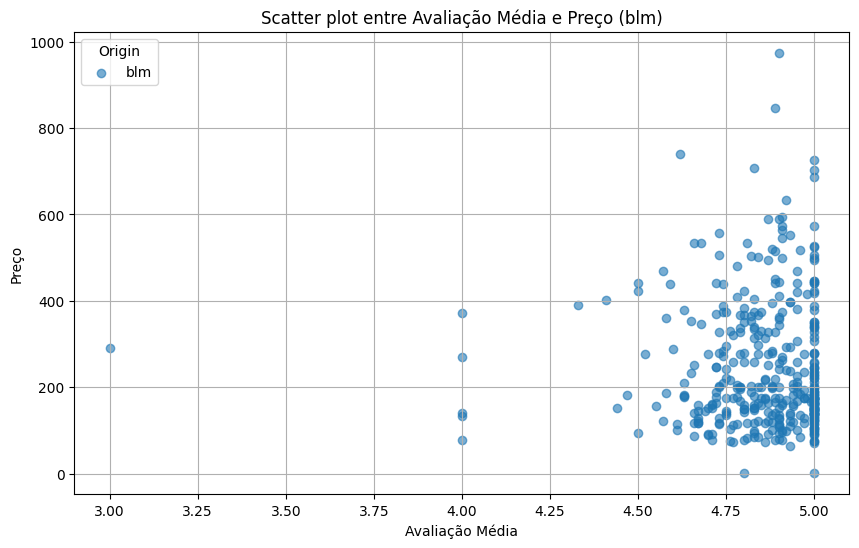

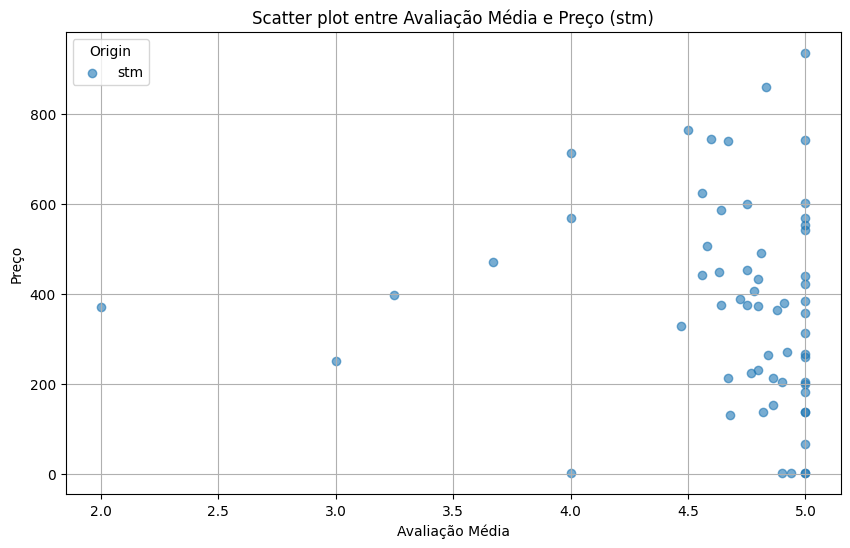

In [103]:
# Filtrar dados para origin == 'blm' e origin == 'stm'
blm_data = database[database['origin'] == 'blm']
stm_data = database[database['origin'] == 'stm']

# Gráfico de dispersão para origin == 'blm'
plt.figure(figsize=(10, 6))
plt.scatter(blm_data['ratingValue'], blm_data['originalPrice'], label='blm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (blm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

# Gráfico de dispersão para origin == 'stm'
plt.figure(figsize=(10, 6))
plt.scatter(stm_data['ratingValue'], stm_data['originalPrice'], label='stm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (stm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

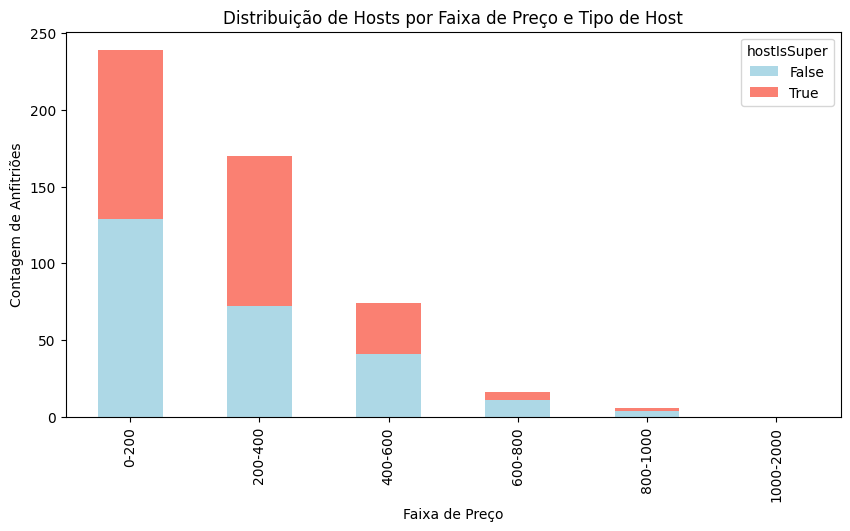

In [104]:
# Classificando as faixas de preço
database['priceCategory'] = pd.cut(database['originalPrice'], bins=[0, 200, 400, 600, 800, 1000, 2000], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-2000'])

# Gráfico de Barras Empilhadas
price_stack = database.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host')
plt.show()

## 3. Distribuição dos Preços das Hospedagens ##

In [105]:
import statsmodels.api as sm

# Selecionar as colunas de características e a coluna alvo
X = database[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y = database.loc[X.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     246.6
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          3.04e-186
Time:                        10:40:58   Log-Likelihood:                 296.18
No. Observations:                 726   AIC:                            -576.4
Df Residuals:                     718   BIC:                            -539.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

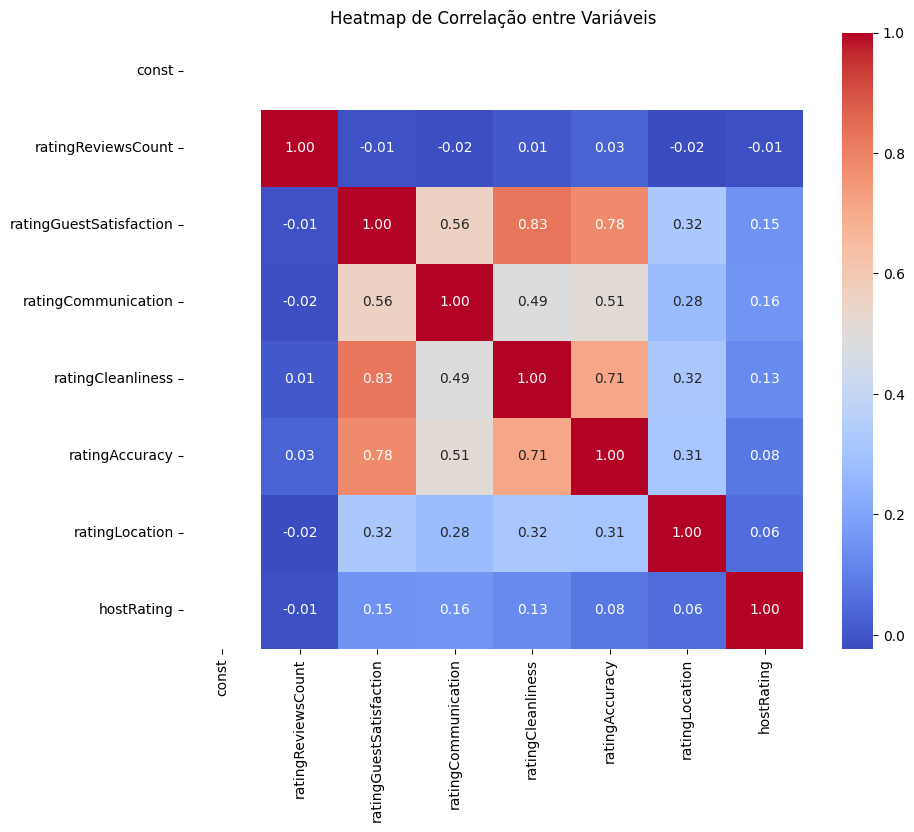

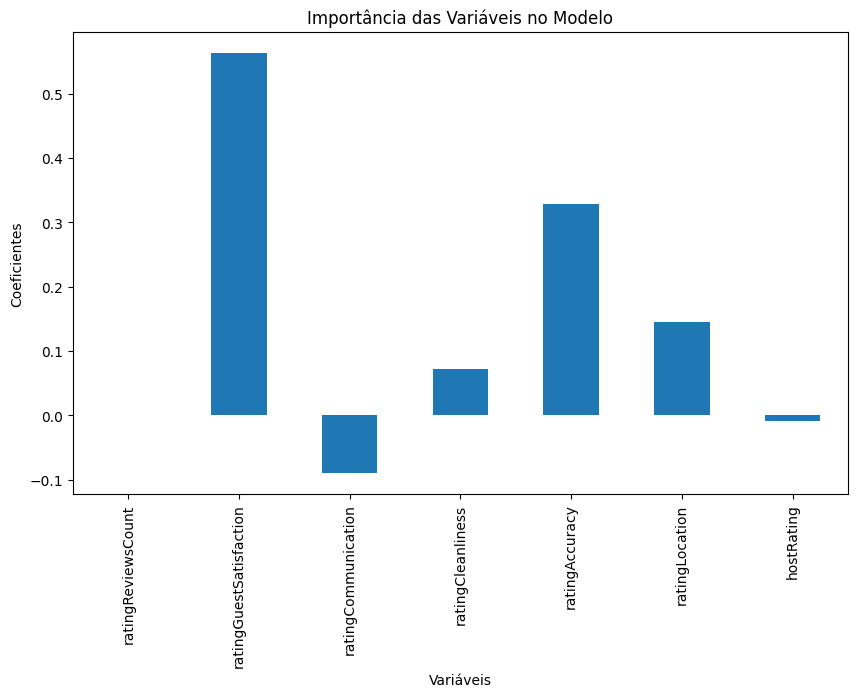

In [106]:
# 1. Correlação entre as variáveis (heatmap)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

# 2. Importância das variáveis no modelo (gráfico de barras)
coefficients = model.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          4.12e-102
Time:                        10:40:58   Log-Likelihood:                 94.519
No. Observations:                 346   AIC:                            -173.0
Df Residuals:                     338   BIC:                            -142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

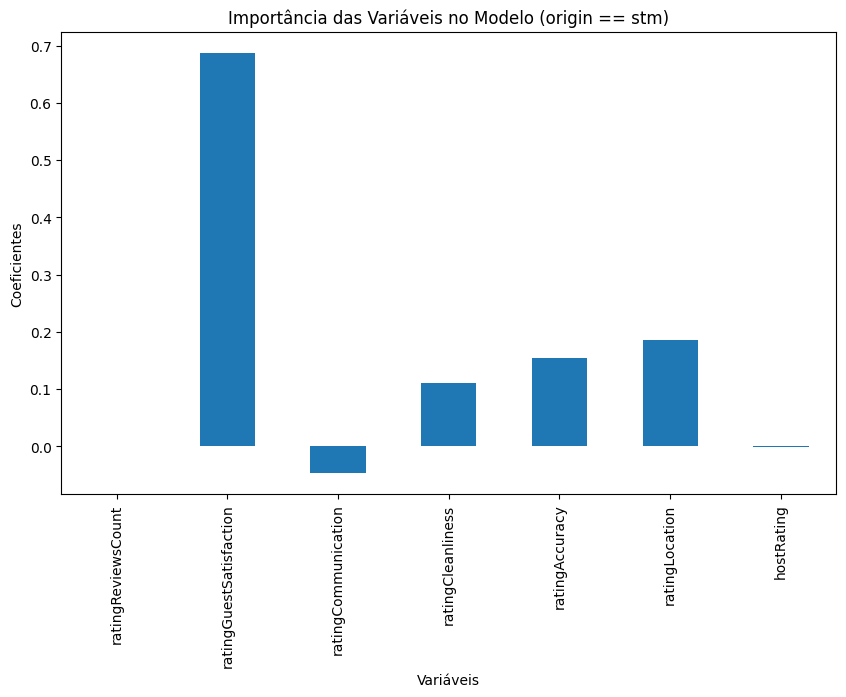

In [107]:
# Filtrar dados para origin == 'stm'
stm_data = database[database['origin'] == 'stm']

# Selecionar as colunas de características e a coluna alvo
X_stm = stm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_stm = stm_data.loc[X_stm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_stm = sm.add_constant(X_stm)

# Ajustar o modelo de regressão linear múltipla
model_stm = sm.OLS(y_stm, X_stm).fit()

# Exibir o resumo do modelo
print(model_stm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_stm = model_stm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_stm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == stm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     67.08
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           3.90e-62
Time:                        10:40:58   Log-Likelihood:                 249.89
No. Observations:                 380   AIC:                            -483.8
Df Residuals:                     372   BIC:                            -452.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

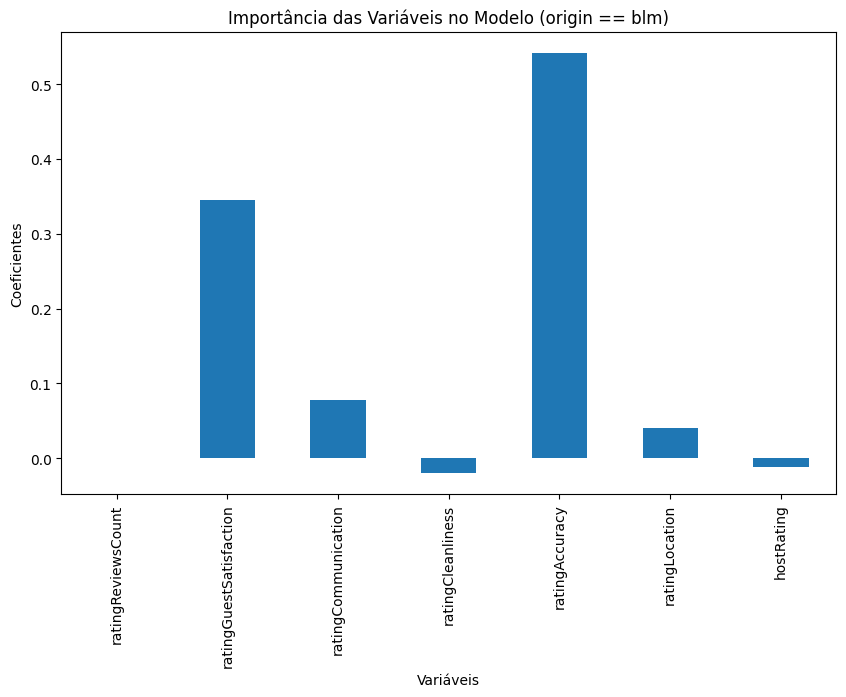

In [108]:
# Filtrar dados para origin == 'blm'
blm_data = database[database['origin'] == 'blm']

# Selecionar as colunas de características e a coluna alvo
X_blm = blm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_blm = blm_data.loc[X_blm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_blm = sm.add_constant(X_blm)

# Ajustar o modelo de regressão linear múltipla
model_blm = sm.OLS(y_blm, X_blm).fit()

# Exibir o resumo do modelo
print(model_blm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_blm = model_blm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_blm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == blm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

In [109]:
# Calcular a média de preço por tipo de hospedagem
mean_price_by_room_type = database.groupby('roomType')['originalPrice'].mean()
print("Média de preço por tipo de hospedagem:")
print(mean_price_by_room_type)

# Calcular a faixa de preço por tipo de hospedagem
price_range_by_room_type = database.groupby('roomType')['originalPrice'].agg(['min', 'max'])
print("\nFaixa de preço por tipo de hospedagem:")
print(price_range_by_room_type)

Média de preço por tipo de hospedagem:
roomType
Entire home/apt    309.788432
Private room       184.440252
Shared room        107.375000
Name: originalPrice, dtype: float64

Faixa de preço por tipo de hospedagem:
                    min    max
roomType                      
Entire home/apt   1.023  973.0
Private room     64.000  928.0
Shared room      74.000  138.0


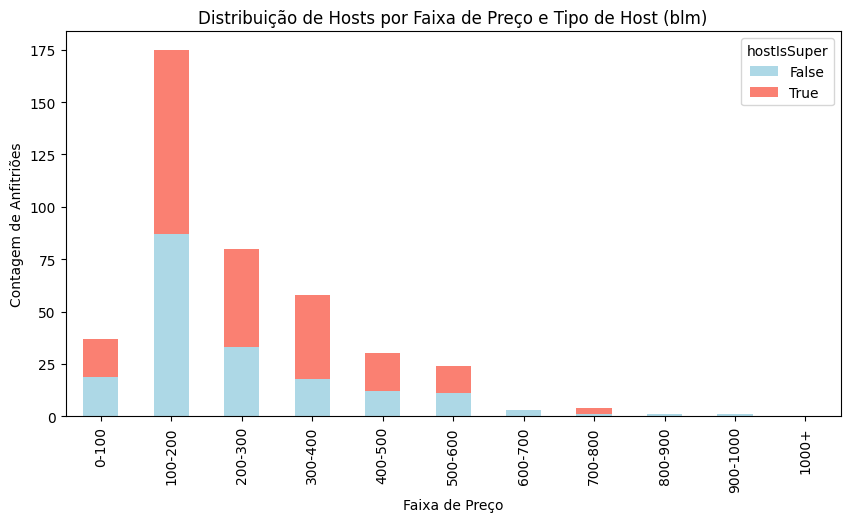

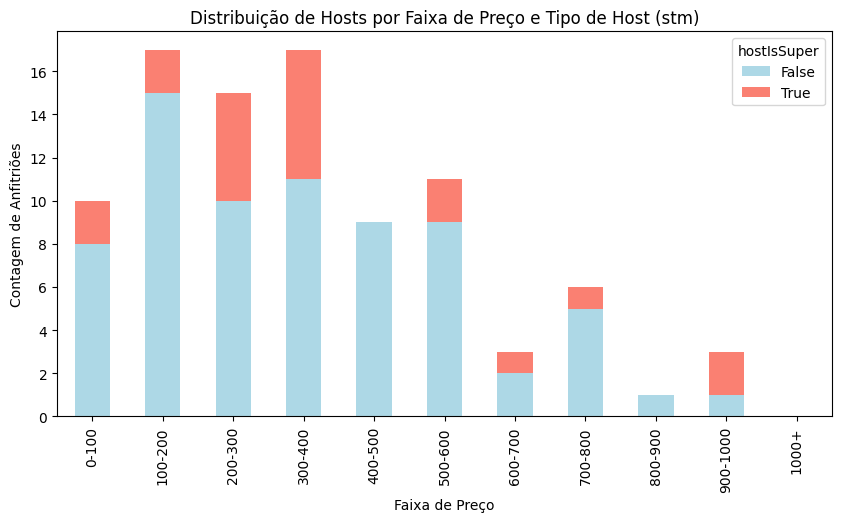

In [110]:
# Classificando as faixas de preço levando em conta a coluna origin
blm_data['priceCategory'] = pd.cut(blm_data['originalPrice'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+'])
stm_data['priceCategory'] = pd.cut(stm_data['originalPrice'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+'])

# Gráfico de Barras Empilhadas para blm
price_stack_blm = blm_data.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack_blm.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host (blm)')
plt.show()

# Gráfico de Barras Empilhadas para stm
price_stack_stm = stm_data.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack_stm.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host (stm)')
plt.show()

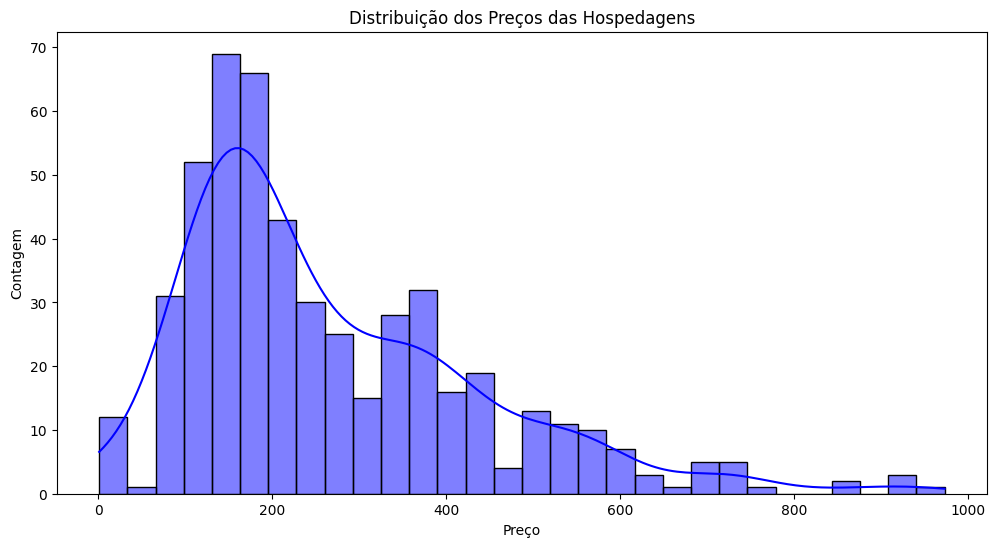

In [111]:
# Distribuição dos Preços das Hospedagens
plt.figure(figsize=(12, 6))
sns.histplot(database['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()


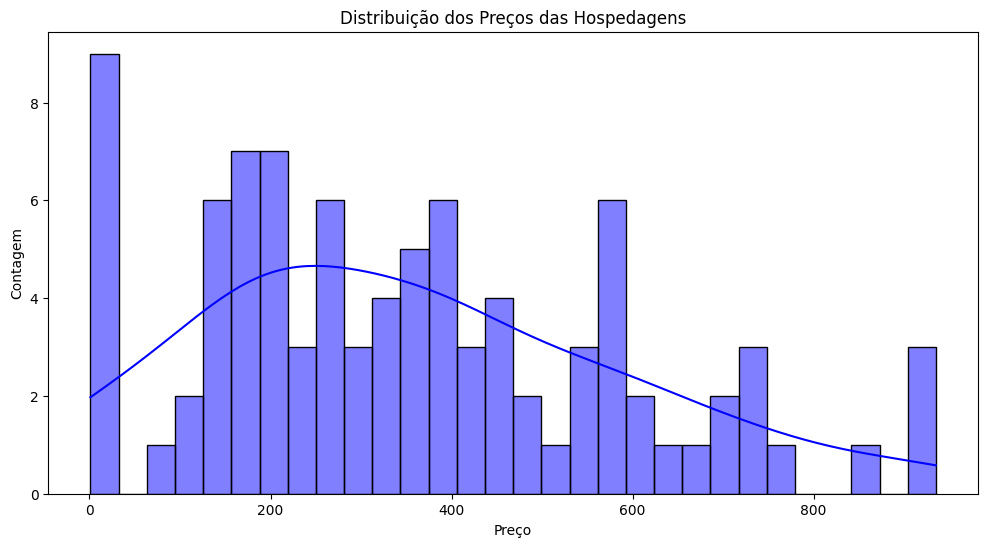

In [112]:
plt.figure(figsize=(12, 6))
sns.histplot(stm_data['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()

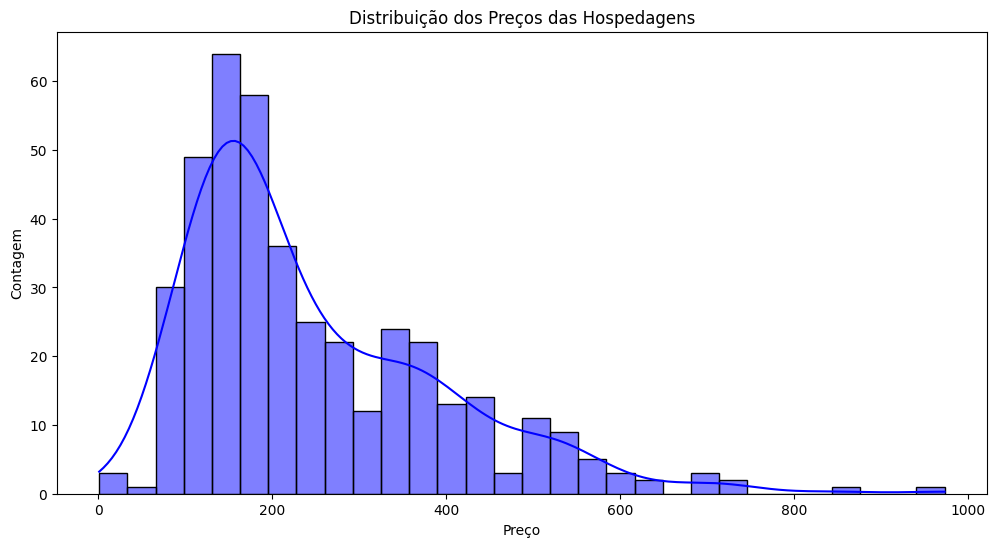

In [113]:
plt.figure(figsize=(12, 6))
sns.histplot(blm_data['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()

In [114]:
database.head()

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,423.0,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,518.0,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,135.0,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,135.0,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200


In [115]:
blm_data

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,423.0,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-500
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,518.0,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,500-600
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,135.0,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,100-200
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,135.0,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,100-200
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1258296442738604234,Charmoso Retiro Perto de Tudo,Aconchegante e bem localizado próximo à Basíli...,"Quarto em Belém, Brasil",Private room,NaN,94.0,94.0,400.00,https://www.airbnb.com/rooms/12582964427386042...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.447240,-48.477940,"['Quarto em casa', 'Muitas atividades por pert...","['Nasci na década de 80', 'Meu trabalho: Profe...","[nan, nan]",blm,0-100
409,1238729804435057749,Quarto em localização ideal,Quarto privativo e aconchegante com banheiro c...,"Quarto em Belém, Brasil",Private room,NaN,110.0,110.0,550.00,https://www.airbnb.com/rooms/12387298044350577...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.468204,-48.487405,"['No top 10% das acomodações', 'Quarto em apar...","['Nasci na década de 90', 'Idiomas: inglês e p...","[nan, nan]",blm,100-200
410,52515419,Quarto em casa com terraço,"Prezo pelo conforto e bem-estar, para que o hó...","Quarto em Terra Firme, Brasil",Private room,NaN,80.0,80.0,290.00,https://www.airbnb.com/rooms/52515419?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.453970,-48.451570,"['Quarto em casa', 'Ótima experiência de check...","['Nasci na década de 80', 'Onde estudei: Unive...","['Resido no bairro a mais de 30 anos, tudo mui...",blm,0-100
411,31324117,Apto/casa Centro de Belém,Atenção. Não cobramos taxa de limpeza.Ao fazer...,"Espaço inteiro: casa em Belém, Brasil",Enti

In [116]:
stm_data

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
413,1284848925482673940,Flat Paraíso da praia 20324,Relaxe neste espaço calmo e cheio de estilo. A...,"Espaço inteiro: apartamento em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,1.250,https://www.airbnb.com/rooms/12848489254826739...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-2.506643,-54.958631,"['Comodidades ao ar livre', 'Self check-in', '...","['Meu trabalho: Administradora', 'Moro em: San...","[nan, nan]",stm,NaN
414,1170406999244775557,Quarto Muiraquitã •\nCasa AmazôniKaa,Este lugar especial é muito bem localizado pró...,"Quarto em Santarém, Brasil",Private room,235.0,267.000,267.000,1.000,https://www.airbnb.com/rooms/11704069992447755...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-2.503780,-54.951200,"['Quarto em casa', 'Caminhada de 4 minutos até...","['Meu trabalho: Guia de Turismo', 'Passo muito...","[nan, nan]",stm,200-300
415,1290829230739229679,Quarto Triplo 2-Pousada Orquídea,"Localizada no centro de Alter do Chão, a 500 ...","Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,800.000,https://www.airbnb.com/rooms/12908292307392296...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.506362,-54.954638,"['Quarto em pousada', 'Comodidades ao ar livre...","['Onde estudei: UFMT', 'Meu trabalho: Engenhei...","[nan, nan]",stm,NaN
416,763165324786463468,Pousada cardume,Tudo o que você quer explorar está a um passo ...,"Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,650.000,https://www.airbnb.com/rooms/76316532478646346...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-2.510813,-54.955368,"['Ótima experiência de check-in', 'Quarto em p...","['Nasci na década de 80', 'Onde estudei: unino...","[nan, nan]",stm,NaN
417,963094139487772842,Quarto Tarubá,Em Alter do chão 🏡850 metros da Ilha do Amor e...,"Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,285.000,https://www.airbnb.com/rooms/96309413948777284...,...,True,Responde em até 1 hora,Taxa de resposta: 99%,-2.503500,-54.958700,"['Quarto em casa', 'Self check-in', 'Cancelame...","['Meu trabalho: airbnb', 'Idiomas: português',...","[nan, nan]",stm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1328353590628975017,Alterlar Casa de Praia em Alter do Chão,Opção perfeita para você e sua família que que...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,843.0,1.023,1.023,4.500,https://www.airbnb.com/rooms/13283535906289750...,...,False,NaN,NaN,-2.502640,-54.945950,"['Caminhada de 1 minuto até o lago', 'Comodida...","['Meu trabalho: Dentista', nan, nan, nan, nan]","[nan, nan]",stm,0-100
862,45629422,Casa em Alter do Chão no Centro acesso as praias.,- Garagem pra 3 carros;- Quarto 1 com uma cama...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,3.000,https://www.airbnb.com/rooms/45629422?locale=p...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.503330,-54.953490,"['Fique no fresquinho', 'Comodidades ao ar liv...","['Moro em: Santarém, Brasil', nan, nan, nan, nan]","['A casa fica no centro de Alter do Chão, na r...",stm,NaN
863,1091261682652318404,Suíte casal,Este lugar cheio de estilo fica perto de desti...,"Quarto em hotel em Santarém, Brasil",Private room,348.0,421.000,421.000,1.830,https://www.airbnb.com/rooms/10912616826523184...,...,False,Responde em até um dia,Taxa de resposta: 67%,-2.511220,-54.949550,"['Self check-in', 'Comodidades ao ar livre', '...","['Nasci na década de 70', 'Onde estudei: Unive...","[nan, nan]",stm,400-500
864,1198601539719395137,Sobrado Alter.,Abrace a natureza sem abrir mão do conforto e ...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,2.958,https://www.airbnb.com/rooms/11986015397193951...,...,False,NaN,NaN,-2.506903,-54.948751,"['Fique no fres

### Localização ###

In [117]:
from sklearn.cluster import KMeans

In [118]:
df_location = stm_data[['id','latitude','longitude']].copy()
df_location.head()

,id,latitude,longitude
413,1284848925482673940,-2.506643,-54.958631
414,1170406999244775557,-2.503780,-54.951200
415,1290829230739229679,-2.506362,-54.954638
416,763165324786463468,-2.510813,-54.955368
417,963094139487772842,-2.503500,-54.958700


In [119]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 413 to 865
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         453 non-null    int64  
 1   latitude   453 non-null    float64
 2   longitude  453 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 30.3 KB


In [120]:
# retirar valores nulos
df_location.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)
df_location.describe()

,id,latitude,longitude
count,4.530000e+02,453.000000,453.000000
mean,8.411872e+17,-2.486526,-54.882484
std,5.147855e+17,0.037381,0.104856
min,7.852749e+06,-2.669693,-55.202598
25%,5.621349e+17,-2.508269,-54.954110
50%,1.065212e+18,-2.505400,-54.947190
75%,1.281902e+18,-2.443978,-54.744361
max,1.355239e+18,-2.384414,-54.685053


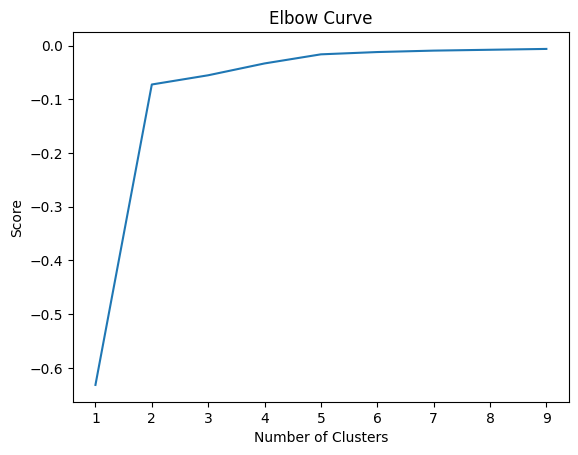

In [121]:
X=df_location.loc[:,['id','latitude','longitude']]

# Elbow Curve
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_location[['latitude']]
X_axis = df_location[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [122]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,id,latitude,longitude,cluster_label
413,1284848925482673940,-2.506643,-54.958631,1
414,1170406999244775557,-2.503780,-54.951200,1
415,1290829230739229679,-2.506362,-54.954638,1
416,763165324786463468,-2.510813,-54.955368,1
417,963094139487772842,-2.503500,-54.958700,1
418,925416981978176829,-2.501740,-54.948860,1
419,977645592663037493,-2.505468,-54.948459,1
420,708138361324411765,-2.505640,-54.957690,1
421,715183140964611968,-2.501770,-54.954950,1
422,40060640,-2.503850,-54.952210,1


In [123]:
loc_type_counts = X['cluster_label'].value_counts()
print("Quantidade por local:")
print(loc_type_counts)

Quantidade por local:
cluster_label
1    312
0    141
Name: count, dtype: int64


In [124]:
# Create a map centered around the mean latitude and longitude
map_center = [X['latitude'].mean(), X['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=12, tiles='cartodb positron')

# Add points to the map
for idx, row in X.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='green' if row['cluster_label'] == 0 else 'red',
        fill=True,
        fill_color='green' if row['cluster_label'] == 0 else 'red',
        fill_opacity=0.6
    ).add_to(map_clusters)

#Add cluster centers to the map

for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        icon=folium.Icon(color='black')
    ).add_to(map_clusters)

# Display the map
map_clusters

## 4. Processamento de Texto ##

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# texto em números --> TF-ID (Term Frequency - Inverse Document Frequency) --> quanto mais vezes uma palavra aparece em um documento e menos vezes em outros, mais importante ela é.

from sklearn.decomposition import TruncatedSVD #reduzir complexidade de dados
import nltk
from nltk.corpus import stopwords

In [126]:
# Português-Brasil
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

#stop_words_custom = ['de', 'para', 'com', 'o', 'a', 'os', 'as', 'não', 'é', 'ser', 'estar']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# Carregar as stopwords em português
custom_stop_words_pt = set(stopwords.words('portuguese'))  # Converte para conjunto (evita duplicatas)

# Lista de novas
novas_stopwords = {'nan'}

custom_stop_words_pt.update(novas_stopwords)
custom_stop_words_pt = list(custom_stop_words_pt)

In [128]:
# Extrair as colunas relevantes
df_relevant = database[['ratingValue', 'originalPrice', 'highlights', 'highlightsHost', 'highlightsLocation', 'origin', 'priceCategory']].copy()

df_relevant.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,4.96,518.0,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,4.93,135.0,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,4.96,135.0,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,4.80,78.0,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200


In [129]:
# Limpar e preprocessar os dados textuais na coluna 'highlights' --> minusculos e sem pontuação (apenas, letras, números ou espaços)
df_relevant['highlights'] = df_relevant['highlights'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant['highlightsHost'] = df_relevant['highlightsHost'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant['highlightsLocation'] = df_relevant['highlightsLocation'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,aproveite para dar um mergulho academia em cas...,idiomas inglês francês português e espanhol mo...,o bairro do umarizal é o mais nobre da cidade ...,blm,400-600
1,4.96,518.0,no top 10 das acomodações comodidades ao ar li...,moro em belém brasil nan nan nan nan,bairro nobre próximo a shopping supermercado...,blm,400-600
2,4.93,135.0,experiência de checkin excepcional ótimos rest...,nan nan nan nan nan,nan nan,blm,0-200
3,4.96,135.0,no top 5 das acomodações quarto em apartamento...,nasci na década de 90 meu trabalho bancária mú...,nan nan,blm,0-200
4,4.80,78.0,no top 10 das acomodações experiência de check...,meu trabalho pereirãofaz tudo curiosidade esto...,nan nan,blm,0-200


In [130]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ratingValue         726 non-null    float64 
 1   originalPrice       505 non-null    float64 
 2   highlights          866 non-null    object  
 3   highlightsHost      866 non-null    object  
 4   highlightsLocation  866 non-null    object  
 5   origin              866 non-null    object  
 6   priceCategory       505 non-null    category
dtypes: category(1), float64(2), object(4)
memory usage: 41.8+ KB


In [131]:
# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words=custom_stop_words_pt)
X_tfidf = vectorizer.fit_transform(df_relevant['highlights'])

# Redução de dimensionalidade com SVD --> 2 componentes (2 colunas)
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X_tfidf)

In [132]:
# Adicionar as componentes SVD ao dataframe
df_relevant['svd_1'] = X_svd[:, 0]
df_relevant['svd_2'] = X_svd[:, 1]
df_relevant['svd_3'] = X_svd[:, 2]

In [133]:
# Obter os termos (palavras) do vocabulário
termos = np.array(vectorizer.get_feature_names_out())

# Obter a matriz de componentes do SVD
componentes = svd.components_

# Para cada componente, pegar as palavras com maior peso
num_palavras = 20  # Número de palavras mais importantes para cada componente

print("🔹 Palavras mais importantes para SVD_1:")
print(termos[np.argsort(-componentes[0])[:num_palavras]])

print("\n🔹 Palavras mais importantes para SVD_2:")
print(termos[np.argsort(-componentes[1])[:num_palavras]])

print("\n🔹 Palavras mais importantes para SVD_3:")
print(termos[np.argsort(-componentes[2])[:num_palavras]])

🔹 Palavras mais importantes para SVD_1:
['livre' 'ar' 'comodidades' 'checkin' 'fique' 'fresquinho' 'self'
 'excepcional' 'experiência' 'cancelamento' 'gratuito' 'quarto' 'antes'
 'casa' 'fev' 'tranquilidade' 'paz' 'acomodações' 'top' 'ótima']

🔹 Palavras mais importantes para SVD_2:
['comodidades' 'ar' 'livre' 'lago' 'caminhada' 'minutos' 'jardim' 'phaty'
 'vista' 'pousada' 'minuto' 'academia' 'vistas' 'praia' 'café' 'elen'
 'compartilhado' 'renata' 'montanha' 'tarciana']

🔹 Palavras mais importantes para SVD_3:
['quatro' 'amigos' 'patas' 'bemvindos' 'excepcional' 'anfitrião'
 'comunicação' 'paz' 'tranquilidade' 'experiência' 'ótima' 'checkin'
 'exclusivo' 'espaço' 'trabalho' 'localização' 'graça' 'estacione'
 'quarto' 'imbatível']


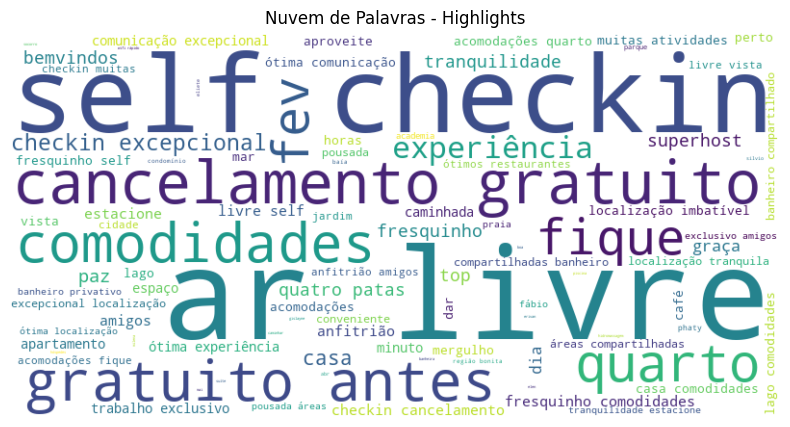

In [134]:
from wordcloud import WordCloud

# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlights'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

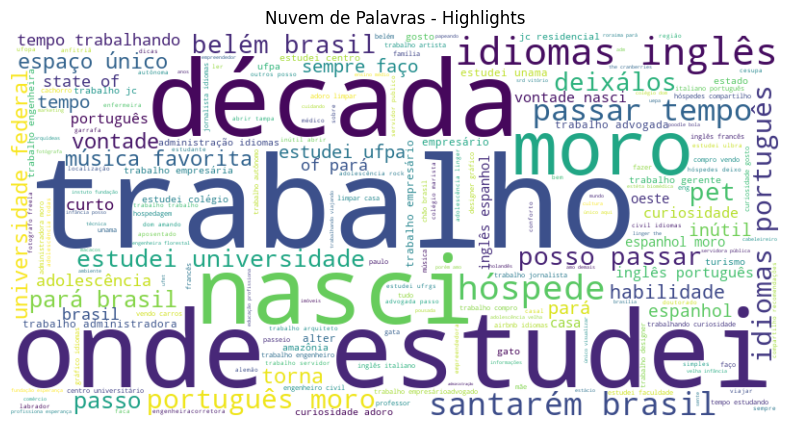

In [135]:
# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlightsHost'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

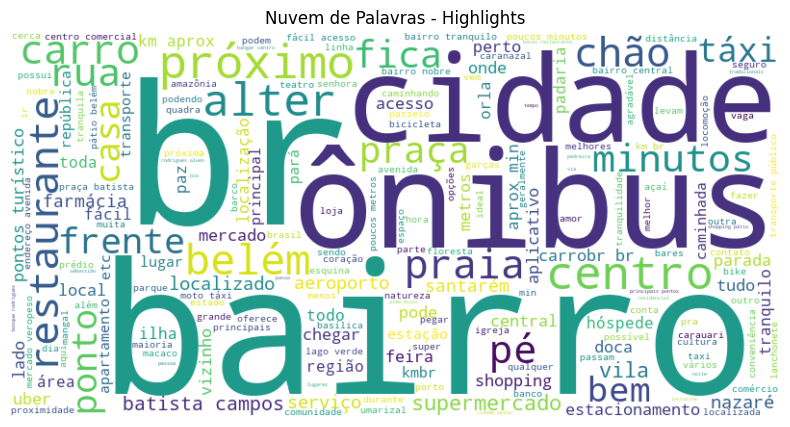

In [136]:
# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlightsLocation'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

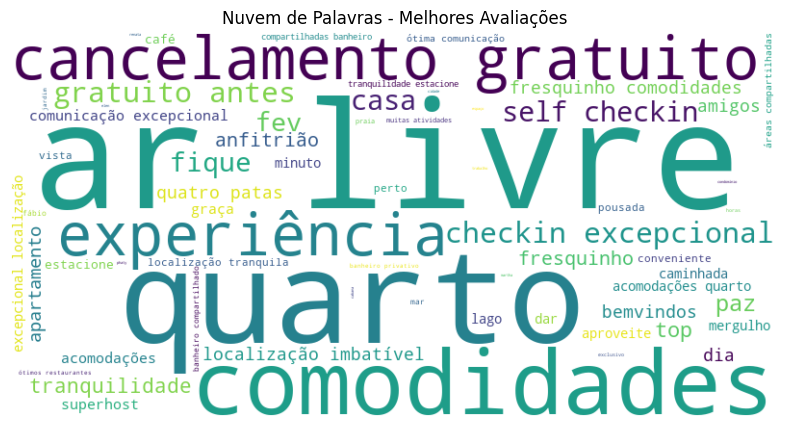

In [137]:
# Filtrar as hospedagens com as melhores avaliações (ratingValue == 5.0)
best_rated = df_relevant[df_relevant['ratingValue'] == 5.0]

# Concatenar todos os textos da coluna 'highlights' das melhores avaliações
best_rated_text = " ".join(highlight for highlight in best_rated['highlights'])

# Gerar a nuvem de palavras
best_rated_wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(best_rated_text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(best_rated_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Melhores Avaliações')
plt.show()

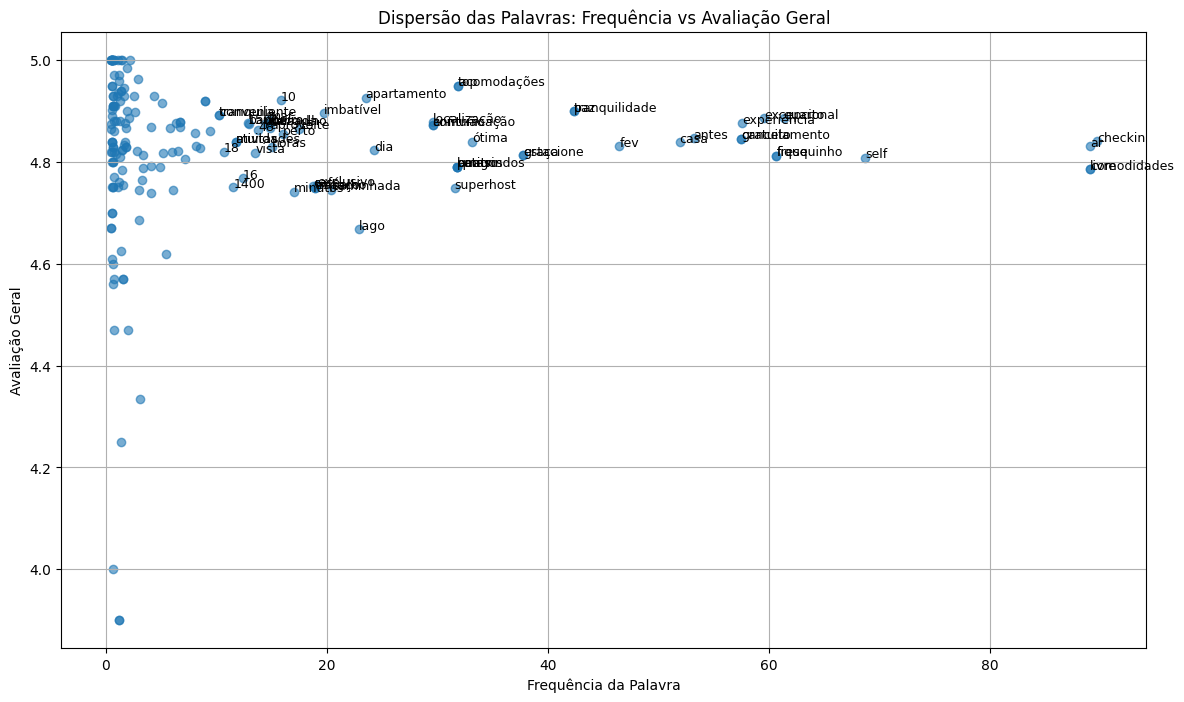

In [138]:
# Obter a frequência das palavras
word_freq = np.asarray(X_tfidf.sum(axis=0)).flatten()

# Criar um DataFrame com as palavras, frequências e avaliações
df_words = pd.DataFrame({'word': termos, 'frequency': word_freq})

# Adicionar a avaliação geral (média) para cada palavra
df_words['rating'] = df_words['word'].apply(lambda word: df_relevant[df_relevant['highlights'].str.contains(word)]['ratingValue'].mean())

# Remover palavras com NaN na avaliação
df_words = df_words.dropna()

# Plotar o gráfico de dispersão
plt.figure(figsize=(14, 8))
plt.scatter(df_words['frequency'], df_words['rating'], alpha=0.6)
plt.title('Dispersão das Palavras: Frequência vs Avaliação Geral')
plt.xlabel('Frequência da Palavra')
plt.ylabel('Avaliação Geral')
plt.grid(True)

# Adicionar rótulos às palavras mais frequentes
for i, row in df_words[df_words['frequency'] > 10].iterrows():
    plt.text(row['frequency'], row['rating'], row['word'], fontsize=9)

plt.show()

### 5. Modelagem de Tópicos ###

In [139]:
from bertopic import BERTopic
# encontra temas/tópicos em textos automaticamente

from sklearn.feature_extraction.text import CountVectorizer
# converter texto em números

In [140]:
database.head(3)

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,423.0,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,518.0,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,135.0,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200


In [141]:
text_data = database[['ratingValue', 'originalPrice', 'highlights', 'highlightsHost', 'highlightsLocation', 'origin', 'priceCategory']].copy()

In [142]:
# Remover linhas com priceCategory igual a zero, vazio ou NaN
text_data = text_data[~text_data['priceCategory'].isin([0, '', np.nan])]

# Verificar se há valores NaN na coluna priceCategory e removê-los
text_data = text_data.dropna(subset=['priceCategory'])

# Verificar o resultado
text_data.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,4.96,518.0,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,4.93,135.0,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,4.96,135.0,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,4.80,78.0,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200


In [143]:
text_data.shape

(505, 7)

In [144]:
text_data.head(3)

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,4.96,518.0,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,4.93,135.0,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200


In [145]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

# Baixar recursos necessários do nltk
nltk.download('stopwords')
nltk.download('rslp') # removedor de sufixos da língua portuguesa --> stemming

# Carregar as stopwords em português
stop_words_pt = set(stopwords.words('portuguese'))
novas_stopwords = {'nan'}

stop_words_pt.update(novas_stopwords)
stop_words_pt = list(stop_words_pt)

# Inicializar o lematizador
stemmer = RSLPStemmer()

def preprocess_text(text):
    # Remover caracteres especiais e números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converter para minúsculas
    text = text.lower()
    # Remover palavras muito curtas
    text = ' '.join(word for word in text.split() if len(word) > 2)
    # Remover stopwords e realizar lematização
    #text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words_pt)
    return text

# Aplicar a função de preprocessamento nas colunas relevantes
text_data['highlights'] = text_data['highlights'].apply(preprocess_text)
text_data['highlightsHost'] = text_data['highlightsHost'].apply(preprocess_text)
text_data['highlightsLocation'] = text_data['highlightsLocation'].apply(preprocess_text)

text_data.head(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\gabid\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,aproveite para dar mergulho academia casa self...,idiomas ingls francs portugus espanhol moro pa...,bairro umarizal mais nobre cidade belm repleto...,blm,400-600
1,4.96,518.0,top das acomodaes comodidades livre cancelamen...,moro belm brasil nan nan nan nan,bairro nobre prximo shopping supermercados aos...,blm,400-600
2,4.93,135.0,experincia checkin excepcional timos restauran...,nan nan nan nan nan,nan nan,blm,0-200


In [146]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words_pt)

In [147]:
model = BERTopic(
    vectorizer_model=vectorizer_model,
    min_topic_size=10,
    language='portuguese',
    calculate_probabilities=True,
    verbose=True)

- vectorizer_model=vectorizer_model: Usa o CountVectorizer personalizado para processar o texto.
- language='english': Especifica que o modelo está trabalhando com textos em inglês.
- calculate_probabilities=True: Faz com que o modelo calcule a probabilidade de um documento pertencer a um tópico.
- verbose=True: Mostra mensagens durante o processamento para acompanhar o progresso.

In [148]:
topics, probs = model.fit_transform(text_data['highlights'])

2025-02-17 10:41:01,930 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 16/16 [00:01<00:00, 10.99it/s]
2025-02-17 10:41:06,558 - BERTopic - Embedding - Completed ✓
2025-02-17 10:41:06,558 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-17 10:41:06,828 - BERTopic - Dimensionality - Completed ✓
2025-02-17 10:41:06,828 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-17 10:41:06,877 - BERTopic - Cluster - Completed ✓
2025-02-17 10:41:06,879 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-17 10:41:06,908 - BERTopic - Representation - Completed ✓


In [149]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,26,-1_restaurantes perto_timos restaurantes_timos...,"[restaurantes perto, timos restaurantes, timos...",[comodidades livre self checkin timos restaura...
1,0,114,0_checkin_self checkin_self_localizao,"[checkin, self checkin, self, localizao, super...",[fique fresquinho comodidades livre self check...
2,1,33,1_comunicao_anfitrio_comunicao excepcional_exc...,"[comunicao, anfitrio, comunicao excepcional, e...",[self checkin comunicao excepcional com anfitr...
3,2,31,2_fev quarto_quarto_fev_antes,"[fev quarto, quarto, fev, antes, gratuito ante...",[top das acomodaes quarto casa cancelamento gr...
4,3,31,3_tranquilidade quarto_paz_paz tranquilidade_t...,"[tranquilidade quarto, paz, paz tranquilidade,...",[quarto casa experincia checkin excepcional pa...
5,4,28,4_livre_comodidades livre_comodidades_fresquin...,"[livre, comodidades livre, comodidades, fresqu...",[top das acomodaes fique fresquinho comodidade...
6,5,26,5_amigos_quatro patas_bemvindos_quatro,"[amigos, quatro patas, bemvindos, quatro, pata...","[amigos quatro patas bemvindos nan nan nan, am..."
7,6,26,6_paz_paz tranquilidade_tranquilidade_checkin paz,"[paz, paz tranquilidade, tranquilidade, checki...",[comodidades livre self checkin paz tranquilid...
8,7,22,7_fev comodidades_livre self_checkin cancelame...,"[fev comodidades, livre self, checkin cancelam...",[comodidades livre self checkin cancelamento g...
9,8,21,8_horas_gratuito horas_checkin cancelamento_ho...,"[horas, gratuito horas, checkin cancelamento, ...",[comodidades livre self checkin cancelamento g...


In [150]:
model.get_topic(0)

[('checkin', 0.058394823917459995),
 ('self checkin', 0.052544780058694306),
 ('self', 0.052544780058694306),
 ('localizao', 0.04539992257461026),
 ('superhost', 0.04202274721521702),
 ('experincia', 0.03714539728268403),
 ('experincia checkin', 0.03714539728268403),
 ('fique', 0.0346396934348939),
 ('fique fresquinho', 0.0346396934348939),
 ('fresquinho', 0.0346396934348939)]

In [151]:
model.get_document_info(text_data['highlights'])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,aproveite para dar mergulho academia casa self...,17,17_dar mergulho_dar_aproveite_aproveite dar,"[dar mergulho, dar, aproveite, aproveite dar, ...",[self checkin aproveite para dar mergulho nan ...,dar mergulho - dar - aproveite - aproveite dar...,0.868821,False
1,top das acomodaes comodidades livre cancelamen...,9,9_top acomodaes_acomodaes_top_acomodaes fique,"[top acomodaes, acomodaes, top, acomodaes fiqu...",[top das acomodaes fique fresquinho cancelamen...,top acomodaes - acomodaes - top - acomodaes fi...,1.000000,False
2,experincia checkin excepcional timos restauran...,7,7_fev comodidades_livre self_checkin cancelame...,"[fev comodidades, livre self, checkin cancelam...",[comodidades livre self checkin cancelamento g...,fev comodidades - livre self - checkin cancela...,0.044430,False
3,top das acomodaes quarto apartamento fique fre...,4,4_livre_comodidades livre_comodidades_fresquin...,"[livre, comodidades livre, comodidades, fresqu...",[top das acomodaes fique fresquinho comodidade...,livre - comodidades livre - comodidades - fres...,1.000000,False
4,top das acomodaes experincia checkin excepcion...,6,6_paz_paz tranquilidade_tranquilidade_checkin paz,"[paz, paz tranquilidade, tranquilidade, checki...",[comodidades livre self checkin paz tranquilid...,paz - paz tranquilidade - tranquilidade - chec...,0.245206,False
...,...,...,...,...,...,...,...,...
500,comodidades livre amigos quatro patas bemvindo...,5,5_amigos_quatro patas_bemvindos_quatro,"[amigos, quatro patas, bemvindos, quatro, pata...","[amigos quatro patas bemvindos nan nan nan, am...",amigos - quatro patas - bemvindos - quatro - p...,1.000000,False
501,comodidades livre localizao tranquila convenie...,4,4_livre_comodidades livre_comodidades_fresquin...,"[livre, comodidades livre, comodidades, fresqu...",[top das acomodaes fique fresquinho comodidade...,livre - comodidades livre - comodidades - fres...,0.174762,False
502,comodidades livre amigos quatro patas bemvindo...,5,5_amigos_quatro patas_bemvindos_quatro,"[amigos, quatro patas, bemvindos, quatro, pata...","[amigos quatro patas bemvindos nan nan nan, am...",amigos - quatro patas - bemvindos - quatro - p...,1.000000,False
503,caminhada minuto lago comodidades livre nan nan,12,12_caminhada_lago_caminhada minutos_minutos,"[caminhada, lago, caminhada minutos, minutos, ...",[experincia checkin excepcional caminhada minu...,caminhada - lago - caminhada minutos - minutos...,1.000000,False


In [152]:
model.visualize_hierarchy()

In [153]:
model.visualize_topics()

In [154]:
model.visualize_heatmap()

In [155]:
classes = text_data['priceCategory'].unique()
print(classes)

['400-600', '0-200', '200-400', '600-800', '800-1000']
Categories (6, object): ['0-200' < '200-400' < '400-600' < '600-800' < '800-1000' < '1000-2000']


In [156]:
print(set(model.get_topics().keys()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -1}


In [157]:
print(text_data['highlights'].isnull().sum())  # Verifica se há valores nulos
print(text_data['highlights'].apply(lambda x: len(str(x).strip())).describe())  # Tamanho médio dos textos

0
count    505.000000
mean      62.710891
std       15.320633
min       15.000000
25%       53.000000
50%       64.000000
75%       71.000000
max      101.000000
Name: highlights, dtype: float64


In [158]:
print(len(text_data['highlights']), len(text_data['priceCategory']))

505 505


In [159]:
print(len(model.topics_))  # Deve ser igual a len(text_data['highlights'])

505


In [160]:
topics_per_class = model.topics_per_class(text_data['highlights'], text_data['priceCategory'])

5it [00:00, 142.00it/s]


In [161]:
# Criar DataFrame com os textos e suas classes
df = pd.DataFrame({"Document": text_data['highlights'], "Class": text_data['priceCategory'], "Topic": model.topics_})

# Contar quantos textos existem por classe
print(df["Class"].value_counts())

# Verificar se há classes vazias ou com poucos valores
print(df[df["Class"].isna()])
print(df[df["Class"] == ""])  # Caso haja strings vazias

Class
0-200        239
200-400      170
400-600       74
600-800       16
800-1000       6
1000-2000      0
Name: count, dtype: int64
Empty DataFrame
Columns: [Document, Class, Topic]
Index: []
Empty DataFrame
Columns: [Document, Class, Topic]
Index: []


In [162]:
model.visualize_topics_per_class(topics_per_class)

In [164]:
text_data02 = database[['ratingValue', 'originalPrice', 'highlights', 'highlightsHost', 'highlightsLocation', 'origin', 'priceCategory']].copy()

In [165]:
text_data02['ratingCategory'] = pd.cut(text_data02['ratingValue'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

In [166]:
# Remover linhas com priceCategory igual a zero, vazio ou NaN
text_data02 = text_data02[~text_data02['ratingCategory'].isin([0, '', np.nan])]

# Verificar se há valores NaN na coluna priceCategory e removê-los
text_data02 = text_data02.dropna(subset=['priceCategory'])

# Verificar o resultado
text_data.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,aproveite para dar mergulho academia casa self...,idiomas ingls francs portugus espanhol moro pa...,bairro umarizal mais nobre cidade belm repleto...,blm,400-600
1,4.96,518.0,top das acomodaes comodidades livre cancelamen...,moro belm brasil nan nan nan nan,bairro nobre prximo shopping supermercados aos...,blm,400-600
2,4.93,135.0,experincia checkin excepcional timos restauran...,nan nan nan nan nan,nan nan,blm,0-200
3,4.96,135.0,top das acomodaes quarto apartamento fique fre...,nasci dcada meu trabalho bancria msica favorit...,nan nan,blm,0-200
4,4.80,78.0,top das acomodaes experincia checkin excepcion...,meu trabalho pereirofaz tudo curiosidade estou...,nan nan,blm,0-200


In [167]:
text_data02.shape

(441, 8)

In [169]:
# Aplicar a função de preprocessamento nas colunas relevantes
text_data02['highlights'] = text_data02['highlights'].apply(preprocess_text)
text_data02['highlightsHost'] = text_data02['highlightsHost'].apply(preprocess_text)
text_data02['highlightsLocation'] = text_data02['highlightsLocation'].apply(preprocess_text)

text_data.head(5)

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,aproveite para dar mergulho academia casa self...,idiomas ingls francs portugus espanhol moro pa...,bairro umarizal mais nobre cidade belm repleto...,blm,400-600
1,4.96,518.0,top das acomodaes comodidades livre cancelamen...,moro belm brasil nan nan nan nan,bairro nobre prximo shopping supermercados aos...,blm,400-600
2,4.93,135.0,experincia checkin excepcional timos restauran...,nan nan nan nan nan,nan nan,blm,0-200
3,4.96,135.0,top das acomodaes quarto apartamento fique fre...,nasci dcada meu trabalho bancria msica favorit...,nan nan,blm,0-200
4,4.80,78.0,top das acomodaes experincia checkin excepcion...,meu trabalho pereirofaz tudo curiosidade estou...,nan nan,blm,0-200


In [170]:
topics02, probs02 = model.fit_transform(text_data02['highlights'])

2025-02-17 10:46:19,781 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 14/14 [00:01<00:00, 11.64it/s]
2025-02-17 10:46:20,994 - BERTopic - Embedding - Completed ✓
2025-02-17 10:46:20,994 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-17 10:46:21,218 - BERTopic - Dimensionality - Completed ✓
2025-02-17 10:46:21,220 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-17 10:46:21,262 - BERTopic - Cluster - Completed ✓
2025-02-17 10:46:21,264 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-17 10:46:21,289 - BERTopic - Representation - Completed ✓


In [171]:
freq02 = model.get_topic_info()
freq02.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11,-1_graa_estacione graa_estacione_graa estacione,"[graa, estacione graa, estacione, graa estacio...","[estacione graa nan nan nan, estacione graa na..."
1,0,106,0_checkin_self checkin_self_localizao,"[checkin, self checkin, self, localizao, exper...",[fique fresquinho comodidades livre self check...
2,1,78,1_cancelamento gratuito_cancelamento_gratuito_...,"[cancelamento gratuito, cancelamento, gratuito...",[fique fresquinho experincia checkin excepcion...
3,2,47,2_anfitrio_comunicao_amigos_patas bemvindos,"[anfitrio, comunicao, amigos, patas bemvindos,...",[self checkin comunicao excepcional com anfitr...
4,3,29,3_quarto_fev_fev quarto_antes,"[quarto, fev, fev quarto, antes, gratuito ante...",[top das acomodaes quarto casa cancelamento gr...
5,4,29,4_paz_paz tranquilidade_tranquilidade_tranquil...,"[paz, paz tranquilidade, tranquilidade, tranqu...",[quarto casa experincia checkin excepcional pa...
6,5,23,5_paz tranquilidade_tranquilidade_paz_checkin paz,"[paz tranquilidade, tranquilidade, paz, checki...",[comodidades livre self checkin paz tranquilid...
7,6,19,6_compartilhado_banheiro compartilhado_banheir...,"[compartilhado, banheiro compartilhado, banhei...",[comodidades livre self checkin timos restaura...
8,7,18,7_fresquinho comodidades_apartamento fique_fiq...,"[fresquinho comodidades, apartamento fique, fi...",[top das acomodaes fique fresquinho comodidade...
9,8,16,8_fev fique_fev_fresquinho self_gratuito antes,"[fev fique, fev, fresquinho self, gratuito ant...",[fique fresquinho self checkin cancelamento gr...


In [172]:
model.get_topic(0)

[('checkin', 0.06721900550054977),
 ('self checkin', 0.057643991592682145),
 ('self', 0.057643991592682145),
 ('localizao', 0.05205331242280229),
 ('experincia checkin', 0.04370482555033034),
 ('experincia', 0.04370482555033034),
 ('superhost', 0.043139171018419395),
 ('fique', 0.04037168836013445),
 ('fique fresquinho', 0.04037168836013445),
 ('fresquinho', 0.04037168836013445)]

In [174]:
model.get_document_info(text_data02['highlights'])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,aproveite para dar mergulho academia casa self...,11,11_dar mergulho_dar_aproveite_aproveite dar,"[dar mergulho, dar, aproveite, aproveite dar, ...",[self checkin aproveite para dar mergulho nan ...,dar mergulho - dar - aproveite - aproveite dar...,1.000000,False
1,top das acomodaes comodidades livre cancelamen...,10,10_mar top_top acomodaes_acomodaes_top,"[mar top, top acomodaes, acomodaes, top, mar, ...",[top das acomodaes fique fresquinho cancelamen...,mar top - top acomodaes - acomodaes - top - ma...,1.000000,False
2,experincia checkin excepcional timos restauran...,1,1_cancelamento gratuito_cancelamento_gratuito_...,"[cancelamento gratuito, cancelamento, gratuito...",[fique fresquinho experincia checkin excepcion...,cancelamento gratuito - cancelamento - gratuit...,0.297037,False
3,top das acomodaes quarto apartamento fique fre...,7,7_fresquinho comodidades_apartamento fique_fiq...,"[fresquinho comodidades, apartamento fique, fi...",[top das acomodaes fique fresquinho comodidade...,fresquinho comodidades - apartamento fique - f...,1.000000,False
4,top das acomodaes experincia checkin excepcion...,5,5_paz tranquilidade_tranquilidade_paz_checkin paz,"[paz tranquilidade, tranquilidade, paz, checki...",[comodidades livre self checkin paz tranquilid...,paz tranquilidade - tranquilidade - paz - chec...,1.000000,False
...,...,...,...,...,...,...,...,...
436,experincia checkin excepcional comodidades liv...,5,5_paz tranquilidade_tranquilidade_paz_checkin paz,"[paz tranquilidade, tranquilidade, paz, checki...",[comodidades livre self checkin paz tranquilid...,paz tranquilidade - tranquilidade - paz - chec...,0.792916,False
437,caminhada minutos lago comodidades livre nan nan,12,12_caminhada_lago_minutos_caminhada minutos,"[caminhada, lago, minutos, caminhada minutos, ...",[experincia checkin excepcional caminhada minu...,caminhada - lago - minutos - caminhada minutos...,1.000000,True
438,comodidades livre localizao tranquila convenie...,7,7_fresquinho comodidades_apartamento fique_fiq...,"[fresquinho comodidades, apartamento fique, fi...",[top das acomodaes fique fresquinho comodidade...,fresquinho comodidades - apartamento fique - f...,0.517828,False
439,comodidades livre amigos quatro patas bemvindo...,2,2_anfitrio_comunicao_amigos_patas bemvindos,"[anfitrio, comunicao, amigos, patas bemvindos,...",[self checkin comunicao excepcional com anfitr...,anfitrio - comunicao - amigos - patas bemvindo...,0.163821,False


In [175]:
print(len(text_data02['highlights']), len(text_data02['ratingCategory']))

441 441


In [177]:
df02 = pd.DataFrame({"Document": text_data02['highlights'], "Class": text_data02['ratingCategory'], "Topic": model.topics_})

print(df02["Class"].value_counts())

# Verificar se há classes vazias ou com poucos valores
print(df02[df02["Class"].isna()])
print(df02[df02["Class"] == ""])  # Caso haja strings vazias


Class
4-5    428
3-4     10
2-3      2
1-2      1
0-1      0
Name: count, dtype: int64
Empty DataFrame
Columns: [Document, Class, Topic]
Index: []
Empty DataFrame
Columns: [Document, Class, Topic]
Index: []


In [178]:
df02

,Document,Class,Topic
0,aproveite para dar mergulho academia casa self...,4-5,11
1,top das acomodaes comodidades livre cancelamen...,4-5,10
2,experincia checkin excepcional timos restauran...,4-5,1
3,top das acomodaes quarto apartamento fique fre...,4-5,7
4,top das acomodaes experincia checkin excepcion...,4-5,5
...,...,...,...
817,experincia checkin excepcional comodidades liv...,4-5,5
848,caminhada minutos lago comodidades livre nan nan,4-5,12
858,comodidades livre localizao tranquila convenie...,4-5,7
859,comodidades livre amigos quatro patas bemvindo...,4-5,2


In [180]:
topics_per_class02 = model.topics_per_class(text_data02['highlights'], text_data02['ratingCategory'])

4it [00:00, 167.48it/s]


In [181]:
model.visualize_topics_per_class(topics_per_class02)

In [77]:
# Adicionar os tópicos ao dataframe original
text_data['Topic'] = topics

# Agrupar por ratingValue e contar a frequência de cada tópico
topics_by_rating = text_data.groupby('ratingValue')['Topic'].value_counts().unstack().fillna(0)

# Mostrar os tópicos por ratingValue
#topics_by_rating

In [78]:
# Agrupar por origin e contar a frequência de cada tópico
text_data.groupby('origin')['Topic'].value_counts().unstack().fillna(0)

Topic,-1,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
origin,,,,,,,,,,,,,,,,,,,,,
blm,26.0,106.0,27.0,30.0,26.0,15.0,18.0,19.0,11.0,11.0,...,10.0,0.0,14.0,12.0,13.0,11.0,13.0,12.0,11.0,11.0
stm,4.0,8.0,11.0,2.0,5.0,11.0,7.0,2.0,9.0,8.0,...,5.0,15.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
